<a href="https://colab.research.google.com/github/Mateus-Maciel/projetos-1-/blob/main/Esbo%C3%A7o_a_L%C3%A1pis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importação das bibliotecas e Upload da Imagem
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Por favor, faça o upload da imagem que deseja transformar:")
uploaded = files.upload()

nome_do_arquivo = next(iter(uploaded))
print(f"\nArquivo '{nome_do_arquivo}' carregado com sucesso!")

# Lê e prepara a imagem original
imagem_original_bgr = cv2.imdecode(np.frombuffer(uploaded[nome_do_arquivo], np.uint8), -1)
imagem_original_rgb = cv2.cvtColor(imagem_original_bgr, cv2.COLOR_BGR2RGB)

Por favor, faça o upload da imagem que deseja transformar:


Saving Cris_Site_fc9101955a.jpg to Cris_Site_fc9101955a (1).jpg

Arquivo 'Cris_Site_fc9101955a (1).jpg' carregado com sucesso!


In [19]:
# --- Etapas de Transformação ---

# 1. Converter para escala de cinza
imagem_cinza = cv2.cvtColor(imagem_original_bgr, cv2.COLOR_BGR2GRAY)

# 2. Inverter a imagem
imagem_invertida = cv2.bitwise_not(imagem_cinza)

# 3. Aplicar desfoque
# >>>>> PONTO DE EXPERIMENTAÇÃO! <<<<<
# Altere o valor de (21, 21) aqui e re-execute apenas esta célula!
imagem_desfocada = cv2.GaussianBlur(imagem_invertida, (101, 101), 0)

# 4. Misturar com a função dodge
def dodge(frente, fundo):
    resultado = cv2.divide(frente, 255 - fundo, scale=256)
    return resultado

imagem_esboco = dodge(imagem_cinza, imagem_desfocada)

print("Efeito de esboço processado com sucesso!")

Efeito de esboço processado com sucesso!


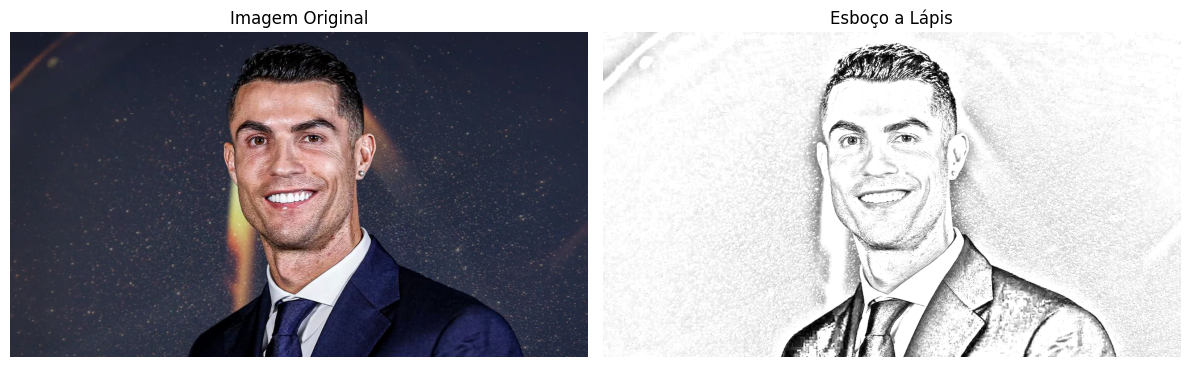

In [20]:
# --- Exibição dos Resultados ---

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_original_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_esboco, cmap='gray')
plt.title('Esboço a Lápis')
plt.axis('off')

plt.tight_layout()
plt.show()